# Examining the SRT spectra

In part 1 of these tutorials we looked at what needs to be done to read the data from the SRT, but we must now turn our attentions to examining the data itself.

To keep this notebook tidy I've collected all of the functions which read in the data into their own file (which is called `srt.py`). We can load the `read_data` function I made using the `import` statement in Python.

In [1]:
from srt import read_data

You might find it helpful to be able to do this with some of your own code as you go along; it allows you to re-use the same functions in multiple notebooks, so that you only need to change them in one place if you need to debug something for example.

Let's take a closer look at some of the spectra from the datafile we used in the last notebook.

In [2]:
datafile = "/data/observatory/srt/archive/srt2018/ra0.00dec-4.00time2018-03-18T13:50:00.000.dat"

In [3]:
data, position, time = read_data(datafile)

Let's take a look at an individual spectrum from the data. Remember this is just the contents of one row of the array.

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Intensity')

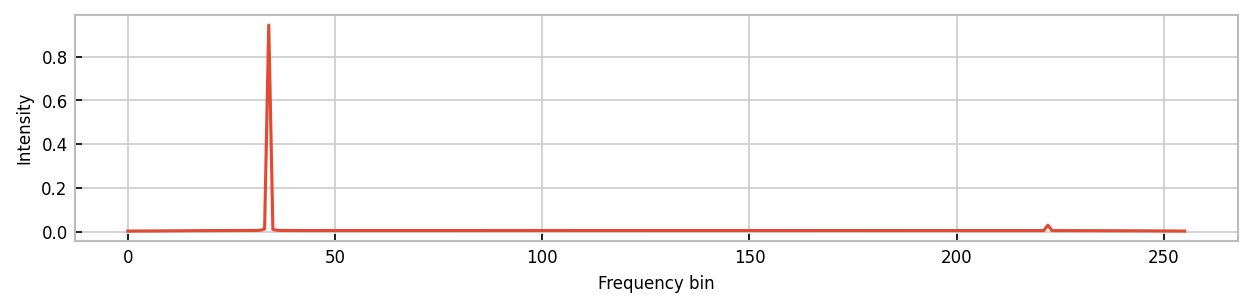

In [12]:
f, ax = plt.subplots(1,1, figsize=(10,2), dpi=150)
ax.plot(data[100, :])
ax.set_xlabel("Frequency bin")
ax.set_ylabel("Intensity")

We can now see why we needed to take a slice through the middle of the spectrum.

You can see two peaks in this spectrum, neither of which are the HI line.

These are in fact observations of two *calibration lines* which are produced by a small transmitter which is located on the telescope itself. They're here to help us to understand the behaviour of the telescope itself.

We'll return to how we use these later, and for now we'll just look at the central region of the spectrum again.

Text(0, 0.5, 'Intensity')

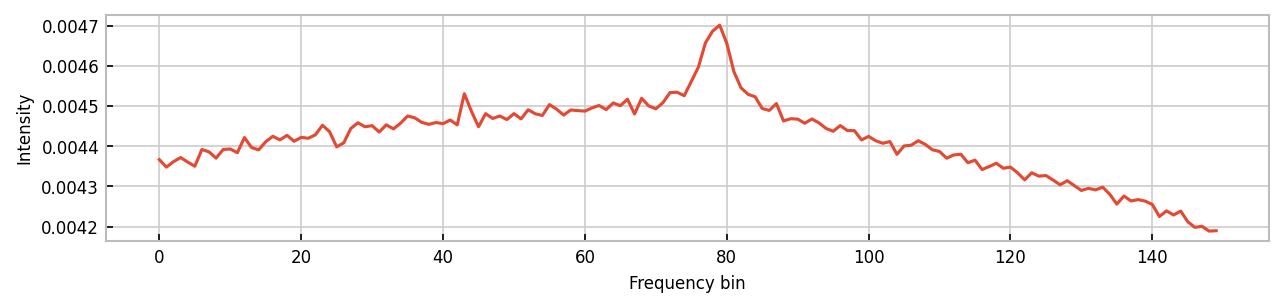

In [13]:
f, ax = plt.subplots(1,1, figsize=(10,2), dpi=150)
ax.plot(data[100, 50:200])
ax.set_xlabel("Frequency bin")
ax.set_ylabel("Intensity (uncalibrated)")

In this plot it's much easier to see the HI spectral line, which is the peak around bin 76 or so.

Another feature which we can see clearly in this spectrum is the curvature of the band itself; this is caused by the electronics of the telescope, and we'll develop some techniques to remove this as we move through the project. 

For now, let's take a look at another spectrum and see if there's any noticable difference.

Text(0, 0.5, 'Intensity (uncalibrated)')

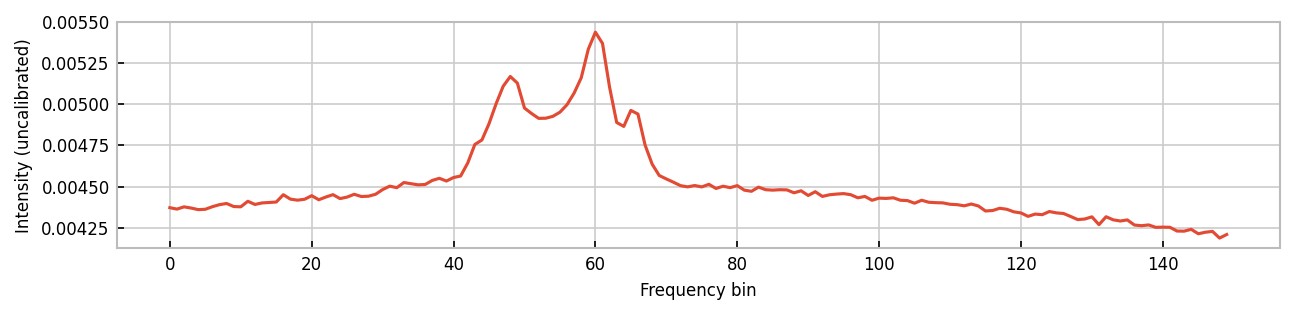

In [16]:
f, ax = plt.subplots(1,1, figsize=(10,2), dpi=150)
ax.plot(data[5000, 50:200])
ax.set_xlabel("Frequency bin")
ax.set_ylabel("Intensity (uncalibrated)")

Again we can clearly see a feature in this spectrum, but it's *very* different to the one before.

This is a nice example of the sort of data we're really interested in. 

The first thing you'll notice is that there appear to be three peaks, rather than just one.
The second is that the HI line has moved from around bin 76 to a region between bins 45 and 65.

So what's going on?

Both differences are a result of the same physical phenomenon, but arising from different causes: Doppler shifting.

The movement of the central frequency is a result of the Earth's rotation and orbit: recall the sinusoidal pattern in the plot at the end of tutorial 1? It had a period of ~24 hours, which is a nice indication that there's something related to the Earth's rotation going on.

The splitting of the peak is a little more subtle, and relates to the structure of the gas we're observing.

HI is emitted via a "forbidden transition" caused by the spin-flip transition of neutral Hydrogen. 
In small quantities of Hydrogen we don't observe this transition because of how improbable it is, but in dense (but optically thin) Hydrogen regions there can be such a large number of Hydrogen atoms that we do in fact observe the transition, and in large quantities.

We also know that the Galaxy is rotating, so we can expect to see regions of gas moving at different (linear) velocities compared to us. If there are different regions of gas travelling at different distances from the galactic centre compared to us they'll appear to have a different linear velocity, and hence be differently Doppler shifted. We can easily see peaks which have been Doppler shifted to three different degrees in this spectrum.

This means that in addition to having knowledge of the position of the Hydrogen on the sky, we can infer some additional information about its distance from us.

Dealing with all of the necessary Doppler corrections to the data is an important part of this project. 
A later chapter of this tutorial will cover it in more detail.